In [129]:
import matplotlib.pyplot as plt
from collections import deque

In [130]:

graph = {
    'A': ['B', 'S'],
    'B': [],
    'C': ['D', 'E', 'F', 'S'],
    'D': [],
    'E': ['C', 'H'],
    'F': ['C', 'G'],
    'G': ['F', 'H', 'S'],
    'H': ['E', 'G'],
    'S': ['C', 'G'],
}

In [131]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add(self, child, path):
        self.children.append((child, path))

def State_space_tree(graph, start):
    path = []
    root = TreeNode(start)
    SPT(graph, root, path)
    return root

def SPT(graph, parent, path):
    for child in graph[parent.value]:
        if child not in path:
            child_node = TreeNode(child)
            parent.add(child_node, path + [child])
            SPT(graph, child_node, path + [child])

def visualize(node, ax, x, y, dx, dy):
    ax.text(x, y, node.value, ha='center', va='center', bbox=dict(facecolor='yellow', edgecolor='black'))
    children_width = 0
    if node.children:
        children_count = len(node.children)
        start = x - (children_count - 1)
        for child, _ in node.children:
            width = visualize(child, ax, start, y - dy, dx, dy)
            ax.plot([x, start], [y, y - dy], 'k-')
            start += width + dx 
            children_width += width + dx
    return max(dx, children_width - dx)

def visualizeTree(tree):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_axis_off()

    dx = 0.75
    dy =0.75
    visualize(tree, ax, 0, 0, dx, dy)
    plt.title("State Space tree")
    plt.show()

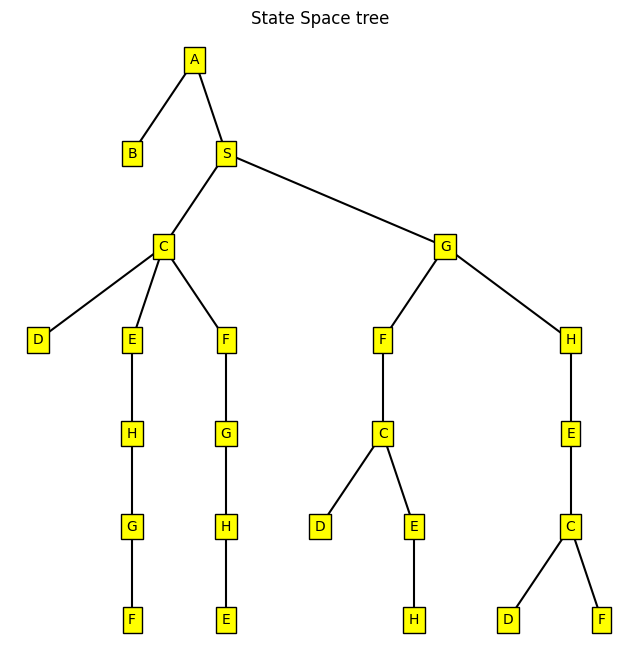

In [132]:
start = 'A'
state_space_tree = State_space_tree(graph, start)

visualizeTree(state_space_tree)

In [133]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child, path):
        self.children.append((child, path))

def State_space_tree(graph, start):
    path = []
    root = TreeNode(start)
    SPT(graph, root, path)
    return root

def SPT(graph, parent, path):
    for child in graph[parent.value]:
        if child not in path:
            child_node = TreeNode(child)
            parent.add_child(child_node, path + [child])
            SPT(graph, child_node, path + [child])

start = 'A'
state_space_tree = State_space_tree(graph, start)


In [134]:
def bfs(node, goal):
    if node is None:
        return

    queue = deque()
    queue.append((node, [node.value]))

    while queue:
        current_node, path = queue.popleft()
        print(current_node.value, end=" ")

        if current_node.value == goal:
            print("\nGoal reached. Path:", "->".join(path))
            return

        for child, i in current_node.children:
            queue.append((child, path + [child.value]))


In [135]:
def dfs(node, goal, path=[]):
    if node is None:
        return False

    path.append(node.value)
    print(node.value, end=" ")

    if node.value == goal:
        print("\nGoal reached. Path:", "->".join(path))
        return True

    for child, i in node.children:
        if dfs(child, goal, path.copy()):
            return True
    path.pop()  

In [136]:
def dls(node, limit, goal, path=[]):
    if node is None or limit <= 0:
        return False

    path.append(node.value)
    print(node.value, end=" ")

    if node.value == goal:
        print("\nGoal reached within limit. Path:", "->".join(path))
        return True

    for child, i in node.children:
        if dls(child, limit - 1, goal, path.copy()):
            return True

    if limit == 1 or node.value == goal:
        path.pop() 

In [137]:
print("BFS Traversal :")
bfs(state_space_tree, 'H')

print("\nDFS Traversal :")
dfs(state_space_tree, 'H')

print("\nDepth-Limited Search Traversal(Limit 3):")
dls(state_space_tree, 4, 'H')

BFS Traversal :
A B S C G D E F F H 
Goal reached. Path: A->S->G->H

DFS Traversal :
A B S C D E H 
Goal reached. Path: A->S->C->E->H

Depth-Limited Search Traversal(Limit 3):
A B S C D E F G F H 
Goal reached within limit. Path: A->S->G->H


True